In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

pd.set_option('display.max_columns', None)

In [27]:
def preprocess(csv_file_name):
    
    df = pd.read_csv(csv_file_name)
    return df

In [28]:
f_name = 'train_data.csv'
df = preprocess(f_name)
df.head()

,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,POSTCODE,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1001791101,1,179,1101,NaN,155 FRANKLIN ST LLC,RK,4,0,0,NaN,6.0,3463000,118035,1558350,0,0,NaN,155 FRANKLIN STREET,10013.0,NaN,0,0,118035.0,1469160.0,NaN,NaN,NaN,FINAL,2018/19,AC-TR,MANHATTAN,40.719232,-74.008095,101.0,1.0,33.0,1002013.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-74.008095 40.719232)
1,1000163436,1,16,3436,NaN,BROADLAR LLC,R4,2,0,0,NaN,23.0,247784,17301,111503,17301,111503,6800.0,225 RECTOR PLACE,10280.0,NaN,0,0,17301.0,100640.0,17301.0,100640.0,NaN,FINAL,2018/19,AC-TR,MANHATTAN,40.709270,-74.016487,101.0,1.0,31704.0,1000053.0,Battery Park City-Lower Manhattan,POINT (-74.016487 40.70927)
2,1000761255,1,76,1255,NaN,"HAM, RICHARD",R4,2,0,0,NaN,25.0,173338,11304,78002,0,0,NaN,99 JOHN STREET,10038.0,NaN,128,172,11304.0,67154.0,NaN,NaN,NaN,FINAL,2018/19,AC-TR,MANHATTAN,40.708006,-74.006164,101.0,1.0,1502.0,1087867.0,Battery Park City-Lower Manhattan,POINT (-74.006164 40.708006)
3,1000161179,1,16,1179,NaN,"SHIM, HAE JIN",R4,2,0,0,NaN,27.0,184550,14081,83048,14081,83048,6800.0,377 RECTOR PLACE,10280.0,NaN,0,0,14081.0,76467.0,14081.0,76467.0,NaN,FINAL,2018/19,AC-TR,MANHATTAN,40.709506,-74.018002,101.0,1.0,31704.0,1000061.0,Battery Park City-Lower Manhattan,POINT (-74.018002 40.709506)
4,1001751526,1,175,1526,NaN,BRIT GIRL LLC,R4,2,0,0,NaN,19.0,559937,10126,251972,0,0,NaN,5 FRANKLIN PLACE,10013.0,NaN,50,130,10126.0,208110.0,NaN,NaN,NaN,FINAL,2018/19,AC-TR,MANHATTAN,40.718024,-74.003903,101.0,1.0,33.0,1001937.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-74.003903 40.718024)


In [29]:
df.isnull().sum(axis = 0)

BBLE                            0
BORO                            0
BLOCK                           0
LOT                             0
EASEMENT                    11823
OWNER                         274
BLDGCL                          0
TAXCLASS                        0
LTFRONT                         0
LTDEPTH                         0
EXT                          8966
STORIES                       711
FULLVAL                         0
AVLAND                          0
AVTOT                           0
EXLAND                          0
EXTOT                           0
EXCD1                        5953
STADDR                         17
POSTCODE                      352
EXMPTCL                     11756
BLDFRONT                        0
BLDDEPTH                        0
AVLAND2                      8183
AVTOT2                       8183
EXLAND2                     10793
EXTOT2                      10164
EXCD2                       11181
PERIOD                          0
YEAR          

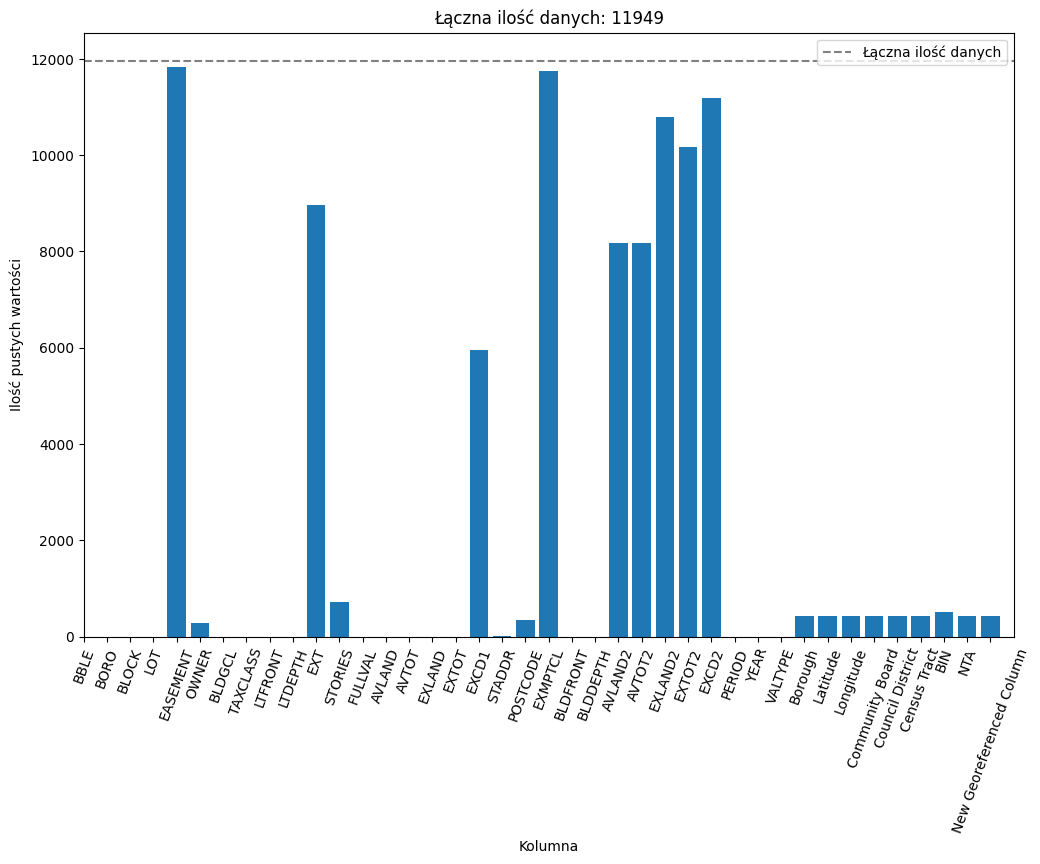

In [40]:
nulls = df.isnull().sum(axis = 0).values
cols = df.columns

plt.bar(cols, nulls)
plt.title(f'Łączna ilość danych: {len(df)}')
plt.ylabel('Ilość pustych wartości')
plt.xlabel('Kolumna')
plt.plot([0, len(cols)], [len(df), len(df)], '--', c='grey', label='Łączna ilość danych')
plt.xlim([0, len(cols)])
plt.xticks(rotation=70)
plt.legend(loc='upper right')
plt.show()

In [31]:
object_dtype = df.dtypes.values[0]
object_dtype

dtype('O')

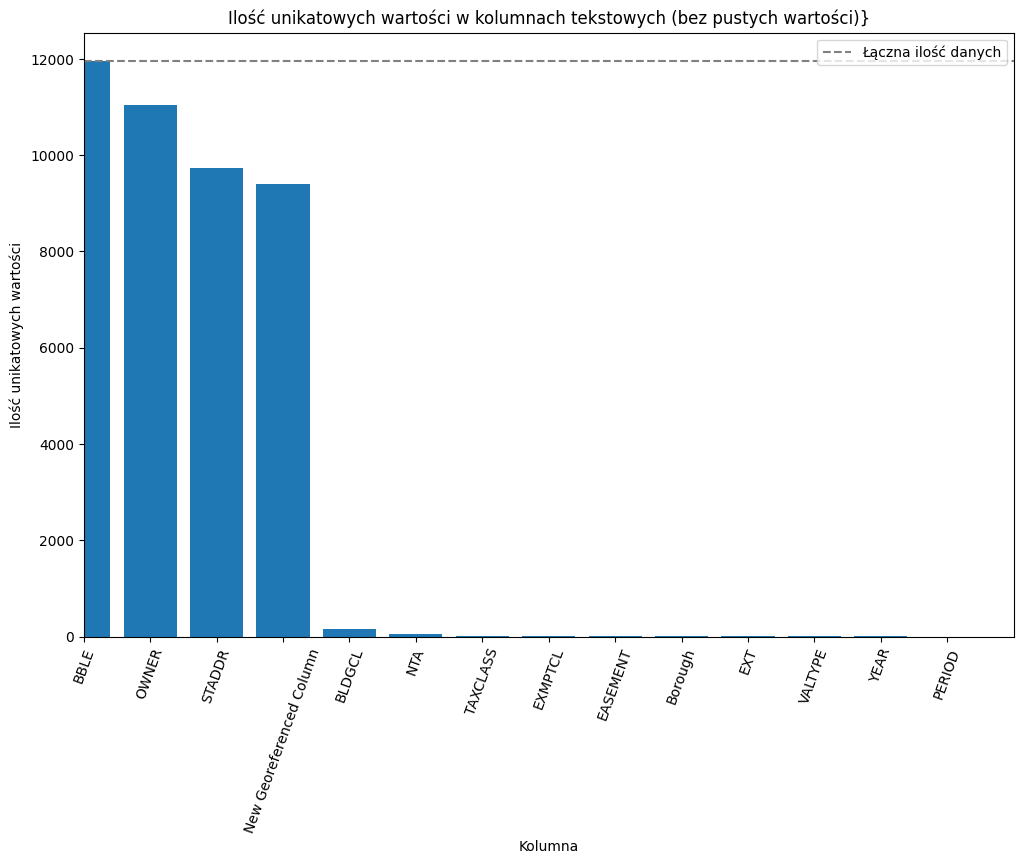

In [47]:
cols = []
vals = []

for col, dtype in zip(df.columns, df.dtypes.values):
    if dtype == object_dtype:
        cols.append(col)
        vals.append(len(np.unique(df[col][~pd.isnull(df[col])])))
        
vals = np.array(vals)
cols = np.array(cols)
sort_arr = np.argsort(vals)[::-1]
cols = cols[sort_arr]
vals = vals[sort_arr]

plt.bar(cols, vals)
plt.title('Ilość unikatowych wartości w kolumnach tekstowych (bez pustych wartości)}')
plt.ylabel('Ilość unikatowych wartości')
plt.xlabel('Kolumna')
plt.plot([0, len(cols)], [len(df), len(df)], '--', c='grey', label='Łączna ilość danych')
plt.xlim([0, len(cols)])
plt.xticks(rotation=70)
plt.legend(loc='upper right')
plt.show()

In [49]:
for a,b in zip(cols, vals):
    print(f'{a}: {b}')

BBLE: 11949
OWNER: 11038
STADDR: 9739
New Georeferenced Column: 9410
BLDGCL: 155
NTA: 45
TAXCLASS: 10
EXMPTCL: 9
EASEMENT: 6
Borough: 5
EXT: 3
VALTYPE: 2
YEAR: 2
PERIOD: 1


In [81]:
def baseline_model(fname, pred_colname='FULLVAL', scale=True, verbose=False, val_size=0.2, random_state=1, epochs=30):
    
    def preprocess(csv_file_name, pred_colname=pred_colname, random_state=random_state, scale=scale):
    
        df = pd.read_csv(csv_file_name)
        x = df[df.columns[df.columns != pred_colname]].values
        y = df[df.columns[df.columns == pred_colname]].values.reshape((-1, 1))
        
        if val_size > 0:
            X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=val_size, random_state=random_state)
        else:
            X_train = x.copy()
            y_train = y.copy()
        
        if scale:
            x_sc = StandardScaler().fit(X_train)
            y_sc = StandardScaler().fit(y_train)
            
            X_train = x_sc.transform(X_train)
            y_train = y_sc.transform(y_train)
            
            if val_size > 0:
                X_val = x_sc.transform(X_val)
                y_val = y_sc.transform(y_val)
            
        if val_size > 0:
            
            if scale:
                return X_train, y_train, X_val, y_val, x_sc, y_sc
            else:
                return X_train, y_train, X_val, y_val
            
        else:
            if scale:
                return X_train, y_train, x_sc, y_sc
            else:
                return X_train, y_train
    
    
    if val_size > 0:
        if scale:
            X_train, y_train, X_val, y_val, x_sc, y_sc = preprocess(fname)
        else:
            X_train, y_train, X_val, y_val = preprocess(fname)
    else:
        if scale:
            X_train, y_train, x_sc, y_sc = preprocess(fname)
        else:
            X_train, y_train = preprocess(fname)
    
    n_features = X_train.shape[1]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(n_features // 2, activation='relu', input_shape=(n_features, )))
    model.add(tf.keras.layers.Dense(n_features // 4, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(loss='mse', metrics=['mae'], optimizer='adam')
    
    if verbose:
        model.summary()
    
    if val_size > 0:
        model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=verbose, epochs=epochs)
    else:
        model.fit(X_train, y_train, verbose=verbose, epochs=epochs)
    
    if scale:
        
        class MyModel:
            
            def __init__(self, model, x_sc, y_sc):
                self.model = model
                self.x_sc = x_sc
                self.y_sc = y_sc
            
            def predict(self, x):
                return self.model.predict(x_sc.transform(x))
        
        return MyModel(model, x_sc, y_sc)
    else:
        return model
    
    
        
    
    

In [82]:
sample_df = df[df.columns[np.logical_and(df.isnull().sum(axis = 0).values == 0, df.dtypes.values != object_dtype)]]
sample_df

,BORO,BLOCK,LOT,LTFRONT,LTDEPTH,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH
0,1,179,1101,0,0,3463000,118035,1558350,0,0,0,0
1,1,16,3436,0,0,247784,17301,111503,17301,111503,0,0
2,1,76,1255,0,0,173338,11304,78002,0,0,128,172
3,1,16,1179,0,0,184550,14081,83048,14081,83048,0,0
4,1,175,1526,0,0,559937,10126,251972,0,0,50,130
...,...,...,...,...,...,...,...,...,...,...,...,...
11944,5,1670,45,25,100,407000,5413,21814,0,0,21,40
11945,5,1691,1023,0,0,244285,1083,11851,1083,1470,20,47
11946,5,1696,50,45,100,298000,8443,16663,1470,1470,25,40
11947,5,1985,130,62,50,459000,9813,25164,1470,1470,31,25


In [83]:
sample_df.to_csv('sample.csv', index=False)

In [85]:
model = baseline_model('sample.csv', verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 60        
                                                                 
 dense_16 (Dense)            (None, 2)                 12        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
299/299 [==============================] - 1s 1ms/step - loss: 1.0825 - mae: 0.1649 - val_loss: 2.8154 - val_mae: 0.1969
Epoch 2/30
299/299 [==============================] - 0s 1ms/step - loss: 1.0248 - mae: 0.1683 - val_loss: 2.5530 - val_mae: 0.1928
Epoch 3/30
299/299 [==============================] - 0s 1

In [86]:
type(model)

__main__.baseline_model.<locals>.MyModel

In [89]:
preds = model.predict(sample_df[sample_df.columns[sample_df.columns != 'FULLVAL']].values)

In [90]:
y_true = sample_df[sample_df.columns[sample_df.columns == 'FULLVAL']].values.reshape((-1, 1))

In [92]:
org_preds = model.y_sc.mean_ + (preds * model.y_sc.scale_)

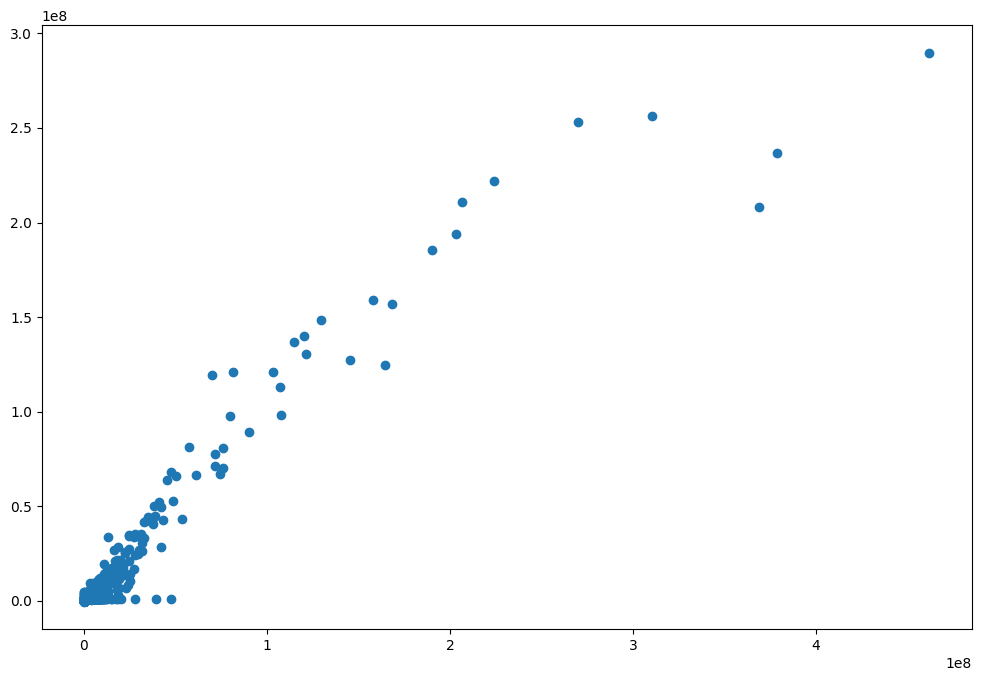

In [94]:
plt.scatter(y_true, org_preds)